# Assignment 4: Linear Regression and Gradient Descent

## Collaboration Policy

This may be a group assignment. Please list the names of group members below if you choose to work with a group

**Author**: *Alexandre Makhmudyantsev*

**Collaborators**: *None*

**Resources used :**
- *Course lectures and slides*
- *https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html*
- *https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe*

## Scoring Breakdown

|Question|Points|
|---|---|
|1.a|10|
|1.b|10|
|2.a|10|
|2.b|10|
|2.c|10|
|2.d|10|
|2.e|10|
|3.a|20|
|3.b|10|
|**Total**|100|

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Question 1. 
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

$$ \hat{y} = (1 * 4) + (2 * 2) + (1+1) = 9 $$

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

**Squared Loss :** $$L_2(y, \hat{y}) = (y - \hat{y})^2$$

**So** $$L_2(y, \hat{y}) = (6.1 - 9)^2 = 8.4$$ 

## Question 2.

The following function generates the dataset you need for the rest of the questions

In [328]:
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    """
    This function generates a synthetic dataset based on a give gamma value
    """
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [329]:
# Generate a dataset with a gamma value of 10
data = generate_dataset(gamma=10)

# Display the dataset
data

,X,Y
0,0.573123,3.256256
1,0.894117,6.259562
2,0.645320,5.586207
3,0.933484,6.984303
4,0.098932,-1.127602
...,...,...
95,0.929356,7.351696
96,0.909448,8.758346
97,0.431768,3.684646
98,0.423286,3.660542


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$. 

In [330]:
# Initialize global variables
x=data['X']
y_obs=data['Y']

# NOTE: I changed 'df' to 'loss_derivative_func' as I kept confusing it with data frame
def gradient_descent(loss_derivative_func, initial_guess, alpha, n):
    """
    Perform gradient descent to find the minimum of a loss function

    Args:
        loss_derivative_func (function): Function that computes the derivative of the loss function
        initial_guess (float): Initial starting point
        alpha (float): Step size to take in each iteration
        n (int): Number of iterations to perform

    Returns:
        np.array: Array containing the sequence of guesses converging to the minimum
    """

    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * loss_derivative_func(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    """
    Calculate the mean squared error loss for the model

    Args:
        gamma (float): The model parameter

    Returns:
        float: The mean squared error between the predicted and observed values
    """
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(gamma):
    """
    Compute the derivative of the MSE loss function with respect to gamma

    Args:
        gamma (float): The model parameter

    Returns:
        float: The derivative of the MSE loss function
    """
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [331]:
# Initialize gamma for GD ; initial starting point
initial_gamma = 0.1

# Initialize alpha for GD ; determines the size of steps to take toward the minimum
alpha = 0.01

# Initialize the number of iterations to perform
iterations = 100

# Run the GD algorithm to find the optimal value of gamma.
# NOTE: `gradient_descent` takes the derivative function `mse_loss_derivative` and calls it within the function
gammas = gradient_descent(mse_loss_derivative, initial_gamma, alpha, iterations)

# Retrieve the last value from the list of gamma values which is the value of gamma after the final iteration
best_gamma = gammas[-1] 

# Print the best gamma
print("Gamma:", best_gamma)

# Calculate and display print the MSE loss for the best gamma
print("Loss:", mse_loss(best_gamma))



Gamma: 3.6321577520324633
Loss: 6.30913510680256


### 2.b.
Create a plot below showing the fitted simple linear regression model on the observed data for when you pick the gamma selected by the above algorithm. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line does not contain an intercept, and labels for both axes

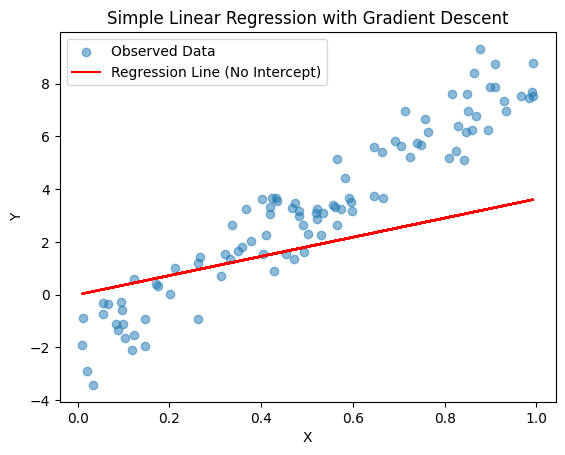

In [332]:
# Create a plot of the observed data
plt.scatter(x, y_obs, label='Observed Data', alpha=0.5)

# Create a regression line
y_pred = best_gamma * x
plt.plot(x, y_pred, color='red', label='Regression Line (No Intercept)')

# Add titles and labels
plt.title('Simple Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### 2.c.

Use a different value of $\alpha=0.1$ and repeat 2.a and 2.b.


In [333]:
# Initialize gamma for GD ; initial starting point
initial_gamma = 0.1

# Initialize alpha for GD ; determines the size of steps to take toward the minimum
# NOTE: Changed alpha
alpha = 0.1

# Initialize the number of iterations to perform
iterations = 100

# Run the GD algorithm to find the optimal value of gamma.
# NOTE: `gradient_descent` takes the derivative function `mse_loss_derivative` and calls it within the function
gammas = gradient_descent(mse_loss_derivative, initial_gamma, alpha, iterations)

# Retrieve the last value from the list of gamma values which is the value of gamma after the final iteration
best_gamma = gammas[-1] 

# Print the best gamma
print("Gamma:", best_gamma)

# Calculate and display print the MSE loss for the best gamma
print("Loss:", mse_loss(best_gamma))

Gamma: 7.300635476969474
Loss: 1.7300250004866802


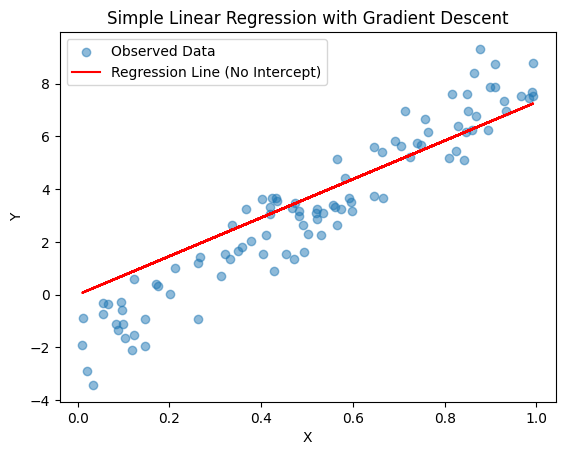

In [334]:
# Create a plot of the observed data
plt.scatter(x, y_obs, label='Observed Data', alpha=0.5)

# Create a regression line
y_pred = best_gamma * x
plt.plot(x, y_pred, color='red', label='Regression Line (No Intercept)')

# Add titles and labels
plt.title('Simple Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### 2.d. Which value of $\alpha$ resulted in a better model? Why? 

Based off of the graphs and the lower MSE the better value of alpha was 0.1 in part B, compared to 0.01 in part A.

This is because alpha can be seen as a "learning rate" as it determines the size of the steps the algorithm takes the larger the alpha the bigger the steps. Given a higher alpha and the ability to take larger steps and the algorithm can find the minimum much faster but it may also allow the algorithm to jump out of a local minimum which could happen with a smaller learning step size. However although a higher alpha results in faster processing time it may overshoot the minimum if the steps are too large resulting in less accuracy. 

### 2.e. What other inputs of the gradient_descent function can we change to imporove the model?

Another input of the gradient_descent function that we can chance to improve the model is  increasing the number of iterations allowing the simulation to run through more steps. For example if we raise the number of iterations in part a closer to 1000 (as shown below) we can see begin to see similar losses for the two different gamma values. Although given the increased accuracy with increasing the number of iterations comes computational expenses. Also, perhaps changing the initial guess can influence and improve the model assuming the guess is closer to the minimum, but in doing so can yield the opposite result as well.

In [335]:
# Initialize gamma for GD ; initial starting point
initial_gamma = 0.1

# Initialize alpha for GD ; determines the size of steps to take toward the minimum
alpha = 0.01

# Initialize the number of iterations to perform
iterations = 800

# Run the GD algorithm to find the optimal value of gamma.
gammas = gradient_descent(mse_loss_derivative, initial_gamma, alpha, iterations)

# Retrieve the last value from the list of gamma values which is the value of gamma after the final iteration
best_gamma = gammas[-1] 

# Print the best gamma
print("Gamma:", best_gamma)
print("Loss:", mse_loss(best_gamma))

Gamma: 7.276121636575869
Loss: 1.7303435122096371


## Question 3.

### 3.a. 
Write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for your model based on whether or not an intercept term is specified within the model.

Hint: Use sklearn.linear_model.LinearRegression library

In [336]:
def calculate_y_hat(X, Y, intercept):
    """ Calculate the predicted y values (y_hat) using linear regression.

    Args:
        X (pd.Series): The input features
        Y (pd.Series): The target values
        intercept (boolean): Determines whether the linear regression model should include an intercept. If it is true the model includes an intercept and if it is false an intercept wont be included

    Returns:
        np.array: the predicted values of Y (y_hat) based on the linear regression model.
    """

    # Reshape X to be a 2D array
    # NOTE: Based off the resources this necessary because scikit-learn expects X to be two-dimensional.
    X_reshaped = X.values.reshape(-1, 1)

    # Create a Linear Regression model
    # The 'fit_intercept' parameter specifies whether to calculate the intercept for the model
    model =  LinearRegression(fit_intercept = intercept)

    # Fit the model with the reshaped  X and target values Y
    model.fit(X_reshaped,Y)

    # Use the model to predict Y values based off X
    y_hat = model.predict(X_reshaped)

    # Return the predicted values.
    return y_hat

### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains and does not contain an intercept, and labels for both axes

You should use different colors for the two line plots

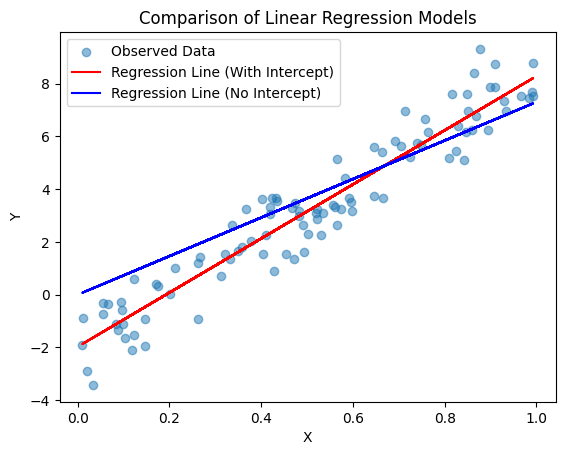

In [337]:
# Calculate y_hat with and without intercept
y_hat_with_intercept = calculate_y_hat(x, y_obs, True)
y_hat_without_intercept = calculate_y_hat(x, y_obs, False)

# Create a plot of the observed data
plt.scatter(x, y_obs, label='Observed Data', alpha=0.5)

# Create regression lines
plt.plot(x, y_hat_with_intercept, color='red', label='Regression Line (With Intercept)')
plt.plot(x, y_hat_without_intercept, color='blue', label='Regression Line (No Intercept)')

# Add titles and labels
plt.title('Comparison of Linear Regression Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()